1.	Given an array of integers arr and an integer x, write a function that returns indices of the two numbers such that they add up to x. You can return the answer in any order.
To consider: 
	▪ 	Negative values possible 
	▪ 	Not previously sorted 
	▪ 	It fits in memory 
2.	Print all possible solutions if there are more than one.
3.	Describe a solution for the case when the data does not fit in memory.


In [ ]:
# Naive method which is not the perfect solution
def numberarray(arr, num):
  list_sum = []
  for i in range(0,len(arr)):
    for j in range( i+1,len(arr)):
      if (arr[i]+ arr[j]==num):
          list_sum.append([i,j])
  return (list_sum)

if __name__ =="__main__":
  
  #arr_list = [2,7,11,15]
  #arr_list =  [3,2,4,3]
  arr_list = [3,3]
  num = 6
  indexlist= numberarray(arr_list, num)
  #print(list_sum.append(indexlist)
  print(indexlist)

[[0, 1]]


#1.write a function that returns indices of the two numbers such that they add up to x


In [ ]:
def numberarray(arr, num):
  # Create a dictionary to store value and indices 
  dict_sum = {}
  # Loop through each element in the list
  for i in range(0,len(arr)):
    # Calculate the difference of target number and current value
    diff= num - arr[i]
    # Check the diff is present in the dictionary
    if diff in dict_sum:
      # Retrun the indices of two number
      return ([dict_sum[diff],i])
    #Add the current value to the dictionary with its index as the value
    dict_sum[arr[i]]=i
  # If no number found, then return an empty list
  return []

if __name__ =="__main__":
  # List of number 
  arr_list = [2,7,11,15]
  #arr_list =  [3,2,4,3]
  #arr_list = [3,3]
  # Target number 
  num = 9
  indexlist= numberarray(arr_list, num)
  print(indexlist)

[0, 1]


#2.If there are multiple pairs of numbers that add up to the target value, we can modify the function to return a list of all possible pairs of indices:

In [ ]:
def numberarray(arr, num):
  # Create a dictionary to store value and indices 
  dict_sum = {}
  num_pairs = []
  # Loop through each element in the list
  for i in range(0,len(arr)):
    # Calculate the difference of target number and current value
    diff= num - arr[i]
    # Check the diff is present in the dictionary
    if diff in dict_sum:
      # append  the indices of two number
      num_pairs.append([dict_sum[diff],i])
    #Add the current value to the dictionary with its index as the value
    dict_sum[arr[i]]=i
  # Return an empty list
  return num_pairs

if __name__ =="__main__":
  # List of number 
  arr_list =  [3,2,4,3]
  # Target number 
  num = 6
  indexlist= numberarray(arr_list, num)
  print(indexlist)

[[1, 2], [0, 3]]


#3.Describe a solution for the case when the data does not fit in memory
If the data doesn't fit in memory, we can use an external sorting algorithm merge-sort to sort the array in place, and then use a two-pointer approach to find pairs of numbers that add up to the target value. The basic idea is to sort the array in ascending order, then use two pointers to scan the array from both ends, adjusting the pointers as necessary to find pairs of numbers that add up to the target value.
The merge_sort function uses the merge-sort algorithm, whic
h is a good choice for external sorting because it divides the input into smaller chunks that can fit into memory, sorts each chunk separately, and then merges the sorted chunks into a single sorted list.
After the array is sorted, a two-pointer approach is used to find pairs of numbers that add up to x. The two pointers start at the beginning and end of the array and move towards each other until they meet in the middle. If the sum of the two numbers pointed by the two pointers is equal to x, the pair of indices is added to the result list. If the sum is less than x, the left pointer is incremented, and if the sum is greater than x, the right pointer is decremented.


In [ ]:
def find_pairs_sum_x(arr, x):
    # Sort the array using merge-sort algorithm
    def merge_sort(arr):
        if len(arr) <= 1:
            return arr
        mid = len(arr) // 2
        left = merge_sort(arr[:mid])
        right = merge_sort(arr[mid:])
        return merge(left, right)
    
    def merge(left, right):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result += left[i:]
        result += right[j:]
        return result
    
    arr = merge_sort(arr)

    # Find pairs of numbers using a two-pointer approach
    i = 0
    j = len(arr) - 1
    result = []
    while i < j:
        if arr[i] + arr[j] == x:
            result.append([i, j])
            i += 1
            j -= 1
        elif arr[i] + arr[j] < x:
            i += 1
        else:
            j -= 1

    return result

if __name__ =="__main__":
  arr_list = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,-10,-20,-100,1000]
  num = 10
  result = find_pairs_sum_x(arr_list, num)
  print(result)

[[3, 10], [4, 9], [5, 8]]


2.	Spark Challenge 
Exercise overview Next exercise is about coding a simple ETL process using Spark. This exercise helps us to check your Spark level and your coding style. Feel free to use any tool for develop (Notebook, IDE, paper…). You can use the Spark SDK of your choice (preferably Spark 2+).
 
Exercise goal Attached to this document you'll find a “events.csv” file containing users’ actions. Each action has a timestamp and a possible value, either "open" or "close". We would like you to reduce data temporal granularity to 10 minutes, so that there is only one single row for each 10 minutes. Over this temporal aggregation count how many actions of each type there are per minute. After previous calculation, please compute the average number of actions each 10 minutes. Finally, we would like you to compute the top 10 minutes with a bigger amount of "open" action. 
 
Can you do a proposal about how to test this job with a unit test, how to test a full pipeline with an integration test, and how to release this job on production with data quality check? 


In [19]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=995ad4c27ab4f5341bb4f66eb2411e3cfd4e8131a6a5baf1c9654b561ff9bc98
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [20]:
from pyspark.sql.functions import col, count,avg
#from pyspark.sql import Window
from pyspark.sql import SparkSession
from google.colab import drive
drive.mount('/content/drive')

#create the sparksession
spark = SparkSession.builder.getOrCreate()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = spark.read.csv("/content/drive/My Drive/events.csv",header=True)
df.show()

+--------------------+------+
|                time|action|
+--------------------+------+
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...| Close|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:19:...|  Open|
|2016-07-28T04:20:...| Close|
+--------------------+------+
only showing top 20 rows



In [22]:
from pyspark.sql.functions import col, floor, count,when

# Read the data from CSV file
df = spark.read.csv("/content/drive/My Drive/events.csv", header=True, inferSchema=True)

# Convert the timestamp column to a Unix timestamp and floor it to the nearest 10 minutes
df = df.withColumn("timestamp", floor(col("time").cast("timestamp").cast("long") / 600) * 600)

# Group the data into 10-minute intervals and count the number of actions
df_grouped = df.groupBy("timestamp").agg(
    count("*").alias("action_count"),
    count(when(col("action") == "Open", True)).alias("open_count")
)

# Compute the average number of actions each 10 minutes
avg_actions = df_grouped.selectExpr("avg(action_count)").collect()[0][0]
print("Average number of actions per 10 minutes:", avg_actions)

# Get the top 10 minutes with the most "Open" actions
top_open_minutes = df_grouped.orderBy(col("open_count").desc()).limit(10)
top_open_minutes.show()

Average number of actions per 10 minutes: 319.4888178913738
+----------+------------+----------+
| timestamp|action_count|open_count|
+----------+------------+----------+
|1469563800|         374|       185|
|1469607600|         349|       184|
|1469652600|         394|       184|
|1469631600|         344|       184|
|1469605200|         348|       184|
|1469577600|         354|       184|
|1469602200|         346|       182|
|1469625600|         355|       182|
|1469629800|         334|       182|
|1469598000|         357|       180|
+----------+------------+----------+



In [ ]:
df_grouped.show()


+----------+------------+----------+
| timestamp|action_count|open_count|
+----------+------------+----------+
|1469550000|         324|       166|
|1469535600|         322|       161|
|1469506200|         273|       164|
|1469615400|         321|       165|
|1469672400|         353|       180|
|1469546400|         340|       174|
|1469620200|         319|       160|
|1469511600|         357|       176|
|1469668200|         338|       168|
|1469684400|          90|         0|
|1469644200|         353|       174|
|1469578200|         333|       144|
|1469628000|         322|       160|
|1469631000|         313|       149|
|1469512200|         319|       169|
|1469643000|         320|       165|
|1469622000|         354|       162|
|1469571600|         325|       162|
|1469676000|         333|       171|
|1469674800|         340|       160|
+----------+------------+----------+
only showing top 20 rows



In [ ]:
top_open_minutes.show()

+----------+------------+----------+
| timestamp|action_count|open_count|
+----------+------------+----------+
|1469563800|         374|       185|
|1469607600|         349|       184|
|1469652600|         394|       184|
|1469631600|         344|       184|
|1469605200|         348|       184|
|1469577600|         354|       184|
|1469602200|         346|       182|
|1469625600|         355|       182|
|1469629800|         334|       182|
|1469598000|         357|       180|
+----------+------------+----------+



We can do following things for the variuos
**Unit Testing:**
For unit testing, we can use a test dataset with a known output and compare the output of our ETL process with it. We can create a small dataset with a few actions and different timestamps to check if the job is producing the expected results. We can also write test cases to validate the following:
If the input file is loaded successfully.
If the output file is created.
If the output file contains expected columns and data.
If the average number of actions is calculated correctly.
If the top 10 minutes with the most "open" actions are computed correctly.
**Integration Testing:**
For integration testing, we can use a larger dataset and run the entire pipeline to validate the end-to-end functionality of the job. We can verify that the data is correctly loaded from the input file, transformed and aggregated as per the requirements, and then saved to the output file. We can also write test cases to validate the following:
If the job runs successfully without any errors.
If the output file contains the expected data.
**Production Release**:
Before releasing the ETL job to production, we can perform the following data quality checks:
Check for missing or incorrect data in the input file.
Validate that the output file is created and contains the expected columns and data.
Verify that the average number of actions and top 10 minutes with the most "open" actions are calculated correctly.
Once the data quality checks are passed, we can release the ETL job to production. It is recommended to schedule the job to run at a regular interval and monitor it for any issues or errors. We can also set up alerts or notifications to notify the team in case of any failures or errors in the job.






3.	SQL Challenge 


In [ ]:
!pip install db-sqlite3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=8866267889782fd268f1367f72d9c92799a8467ad4f8cb7ef77582b63bde940a
  Stored in directory: /root/.cache/pip/wheels/20/fb/1b/2ba46d337e706f0315053f19c8d6e83fc2431c41b7525caaa2
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3891 sha256=fbd582ce2278e884c105f3a548143201a1757322a3325244ff18b78091bc769b
  Stored in directory: /root/.cache/pip/wheels/85/9b/62/ebd5df18a3e9d5ead2b27c11d493f87aedc9d5e3bb0539010c
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31677 sha256=eb772de1b7498270265f483bdbdcf24d90ce0b654a73a7b05e8f85796c5a4b87
  Stored in directory: /root/.cac

In [ ]:
import sqlite3

# Connect to the database (create it if it doesn't exist)
conn = sqlite3.connect('challenge.db')

# Create the 'impression' table
conn.execute('''CREATE TABLE IMPRESSIONS
                (product_id TEXT, click INTEGER, date DATE);''')

# Create the 'products' table
conn.execute('''CREATE TABLE PRODUCTS
                (product_id TEXT, category_id INTEGER, price FLOAT);''')

# Create the 'purchases' table
conn.execute('''CREATE TABLE PURCHASES
                (product_id TEXT, user_id INTEGER, date DATE);''')

# Insert some sample data into the 'impression' table
conn.execute("INSERT INTO IMPRESSIONS VALUES ('1002313003', 1, '2018-07-10')")
conn.execute("INSERT INTO IMPRESSIONS VALUES ('1002313002', 0, '2018-07-10')")

# Insert some sample data into the 'products' table
conn.execute("INSERT INTO PRODUCTS VALUES ('1002313003', 1, 10.0)")
conn.execute("INSERT INTO PRODUCTS VALUES ('1002313002', 2, 15.0)")

# Insert some sample data into the 'purchases' table
conn.execute("INSERT INTO PURCHASES VALUES ('1002313003', 1003431, '2018-07-10')")
conn.execute("INSERT INTO PURCHASES VALUES ('1002313002', 1003432, '2018-07-11')")

# Commit the changes and close the connection
conn.commit()
conn.close()



In [ ]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('challenge.db')

# Get a cursor object
cur = conn.cursor()

# 1. Click-through-rate of each product by month
cur.execute('''SELECT strftime('%Y-%m', IMPRESSIONS.date) AS month, IMPRESSIONS.product_id, AVG(IMPRESSIONS.click * 1.0) AS click_through_rate
               FROM IMPRESSIONS
               GROUP BY month, IMPRESSIONS.product_id''')
click_through_rate_by_month = cur.fetchall()
print("Click-through-rate of each product by month:")
for row in click_through_rate_by_month:
    print(row)

# 2. Top 3 performing categories in terms of click through rate
cur.execute('''SELECT PRODUCTS.category_id, AVG(IMPRESSIONS.click * 1.0) AS click_through_rate
               FROM IMPRESSIONS
               INNER JOIN PRODUCTS ON IMPRESSIONS.product_id = PRODUCTS.product_id
               GROUP BY PRODUCTS.category_id
               ORDER BY click_through_rate DESC
               LIMIT 3''')
top_categories = cur.fetchall()
print("\nTop 3 performing categories in terms of click through rate:")
for row in top_categories:
    print(row)

# 3. Click-through-rate by price tier (0-5, 5-10, 10-15, >15)
cur.execute('''SELECT CASE
                        WHEN PRODUCTS.price BETWEEN 0 AND 5 THEN '0-5'
                        WHEN PRODUCTS.price BETWEEN 5 AND 10 THEN '5-10'
                        WHEN PRODUCTS.price BETWEEN 10 AND 15 THEN '10-15'
                        ELSE '>15'
                    END AS price_tier,
                    AVG(IMPRESSIONS.click * 1.0) AS click_through_rate
               FROM IMPRESSIONS
               INNER JOIN PRODUCTS ON IMPRESSIONS.product_id = PRODUCTS.product_id
               GROUP BY price_tier''')
click_through_rate_by_price_tier = cur.fetchall()
print("\nClick-through-rate by price tier:")
for row in click_through_rate_by_price_tier:
    print(row)

# Close the cursor and the connection
cur.close()
conn.close()


Click-through-rate of each product by month:
('2018-07', '1002313002', 0.0)
('2018-07', '1002313003', 1.0)

Top 3 performing categories in terms of click through rate:
(1, 1.0)
(2, 0.0)

Click-through-rate by price tier:
('10-15', 0.0)
('5-10', 1.0)


ML LEARNING TASK

**Importing Data and Required Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

In [80]:
df = pd.read_csv("/content/drive/My Drive/holiday_rental.csv")

**Dataset information**








*    id: The ID number of the listing
*  host_id: The ID number of the host who owns the listing

*   neighbourhood_group: The borough that the listing is located in (e.g. Manhattan, Brooklyn, etc.)

*  
neighbourhood: The specific neighbourhood that the listing is located in
*  room_type: The type of room being listed (e.g. private room, entire home/apt, etc.)


*   
price: The nightly price of the listing in USD




*  minimum_nights: The minimum number of nights that a guest must book in order to stay at the listing
*   
number_of_reviews: The total number of reviews that the listing has received from guests


*   last_review: The date of the most recent review that the listing has received
*   reviews_per_month: The average number of reviews that the listing receives per month


*   
calculated_host_listings_count: The number of listings that the host owns
*   availability_365: The number of days per year that the listing is available for booking













**Show Top 5 Records**

In [3]:
df.head(10)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,19.10.18,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,21.05.19,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,05.07.19,4.64,1,194
4,5022,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,19.11.18,0.10,1,0
5,5099,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,22.06.19,0.59,1,129
6,5121,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,05.10.17,0.40,1,0
7,5178,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,24.06.19,3.47,1,220
8,5203,7490,Manhattan,Upper West Side,Private room,79,2,118,21.07.17,0.99,1,0
9,5238,7549,Manhattan,Chinatown,Entire home/apt,150,1,160,09.06.19,1.33,4,188


In [4]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Show statistical analysis of our dataset**

In [5]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Mean Price is greater than  of Median price, so there are definitely some outliers in this column

**Data set information and  type**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(1), int64(7), object(

**Corelationship between each features**

In [7]:
corr = df.corr()
corr

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
price,0.010619,0.015309,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


Here,id and host id are highly correlated to each other as compare to other features.So, we can take one of them for model further processing.

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

We have 4 categorical features : ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


### There are total 12 columns in the dataframe. Among 12 columns, 8 columns are numerical and reminaing 4 are categorical columns.

**Check Missing Values**

In [ ]:
df.isna().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Except two columns last_review  and reviews_per_month, all of them have no missing values.As the two columns have large missing values so we can removed it from data for prepreocessing.

**Check Duplicates**

In [ ]:
df.duplicated().sum()

0

There are no duplicates  values in the data set

**Checking the number of unique values of each column**

In [ ]:
df.nunique()

id                                48895
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Exploratory Data Analysis**

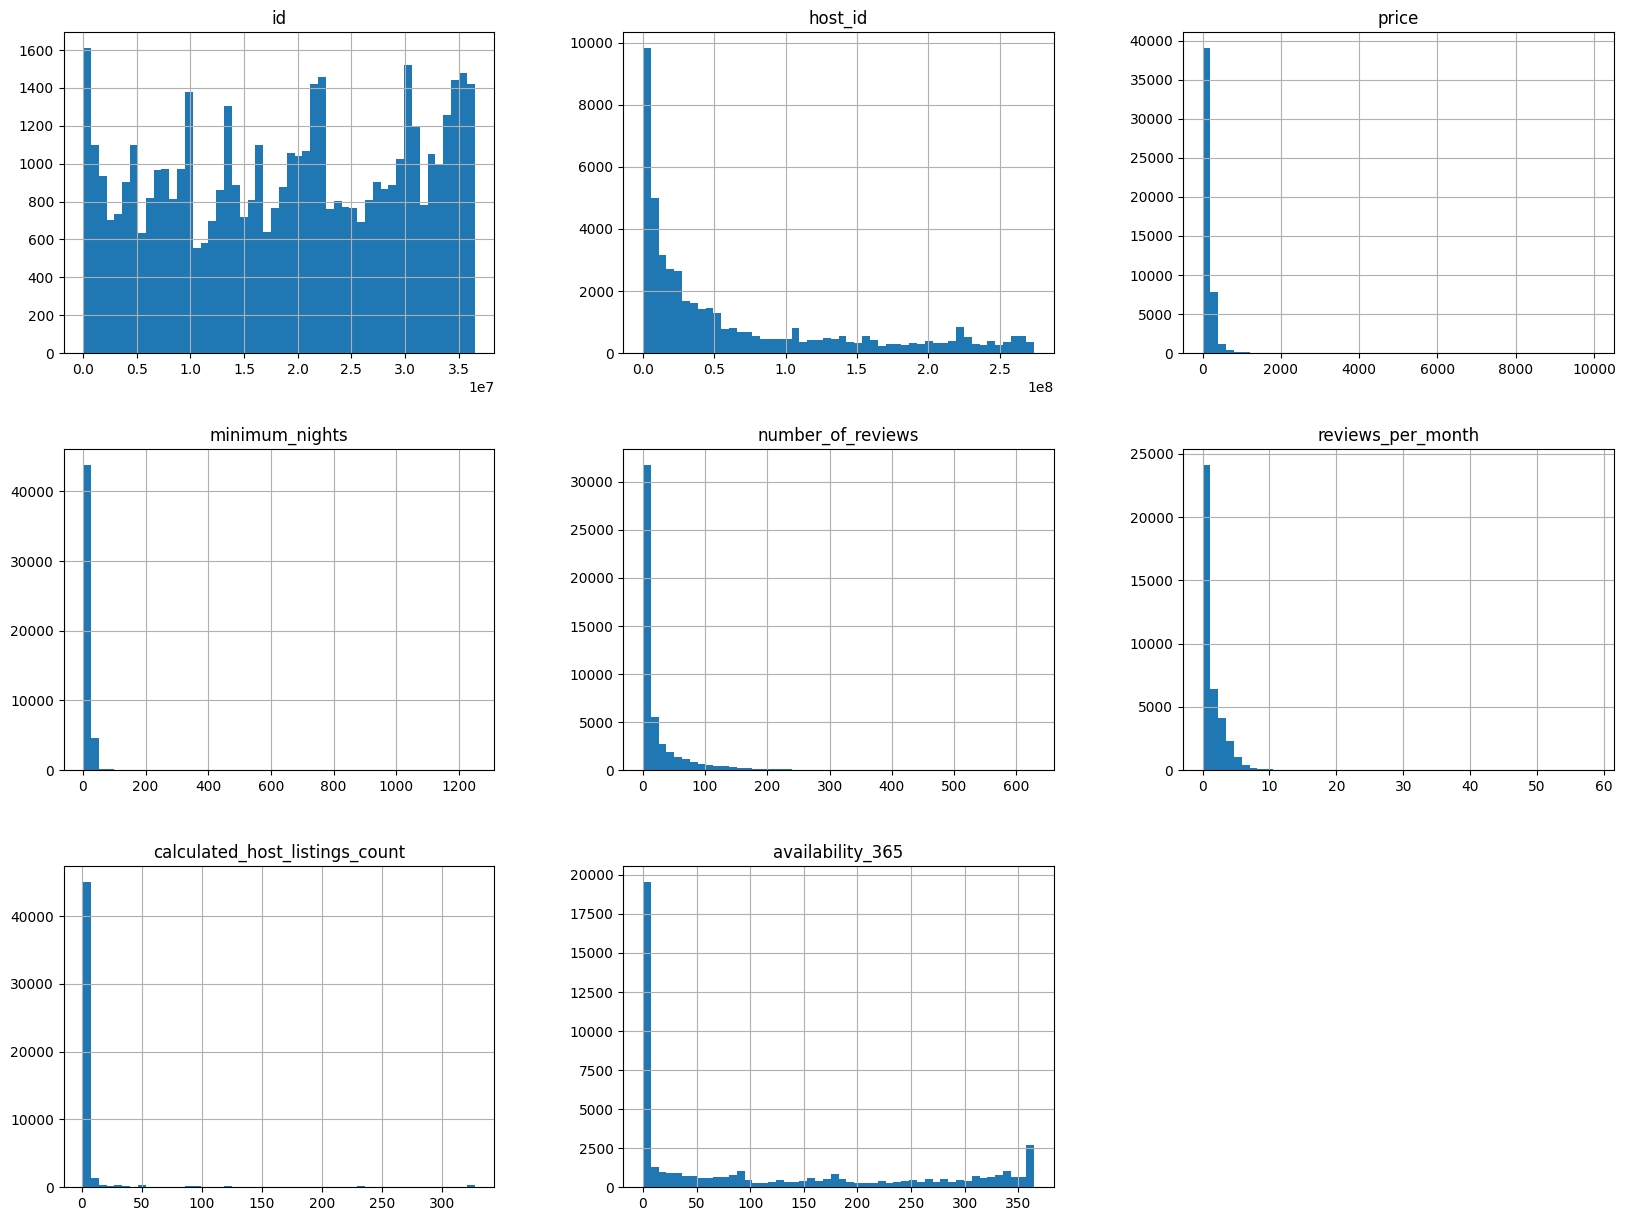

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

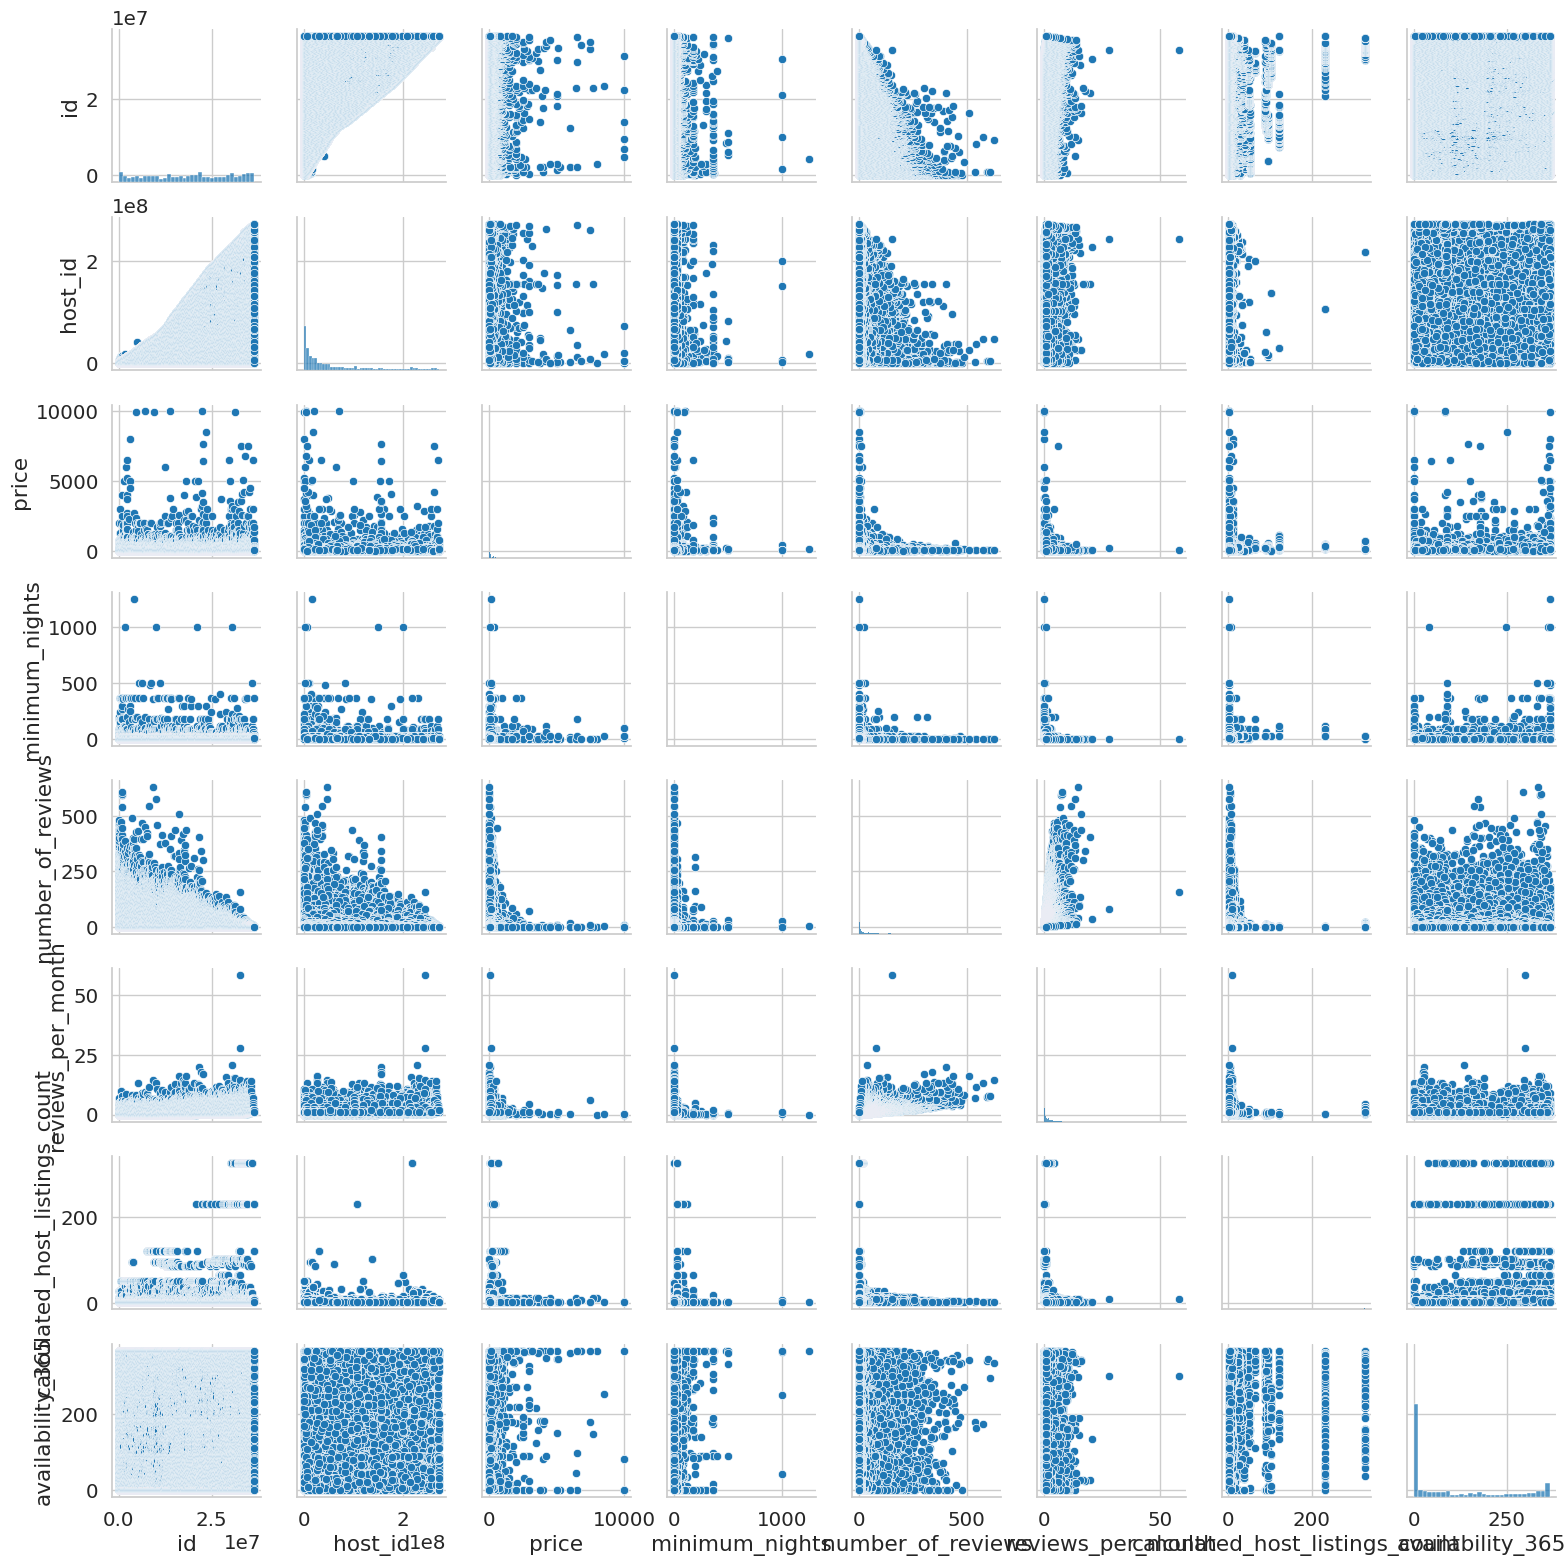

In [ ]:
sns.pairplot(df,height=2)
plt.show()

Checking the Distribution of price(target variable) Univariate analysis

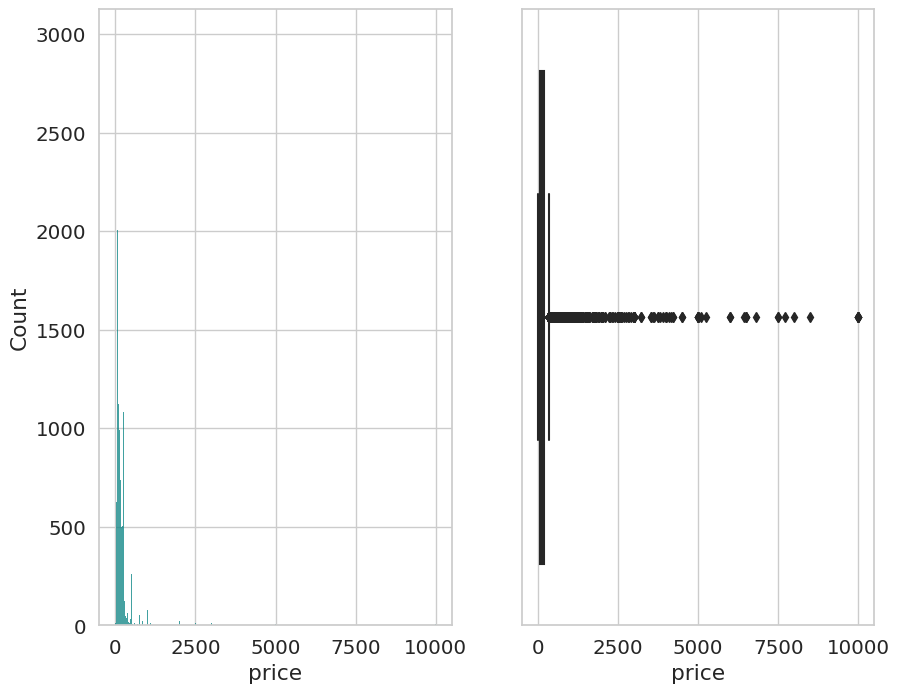

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.histplot(x = df['price'], color='teal', ax= ax[0])
ax2 = sns.boxplot(x = df['price'], ax= ax[1], color= 'teal')

fig.show()



Checking the Distribution of minimum_nights 


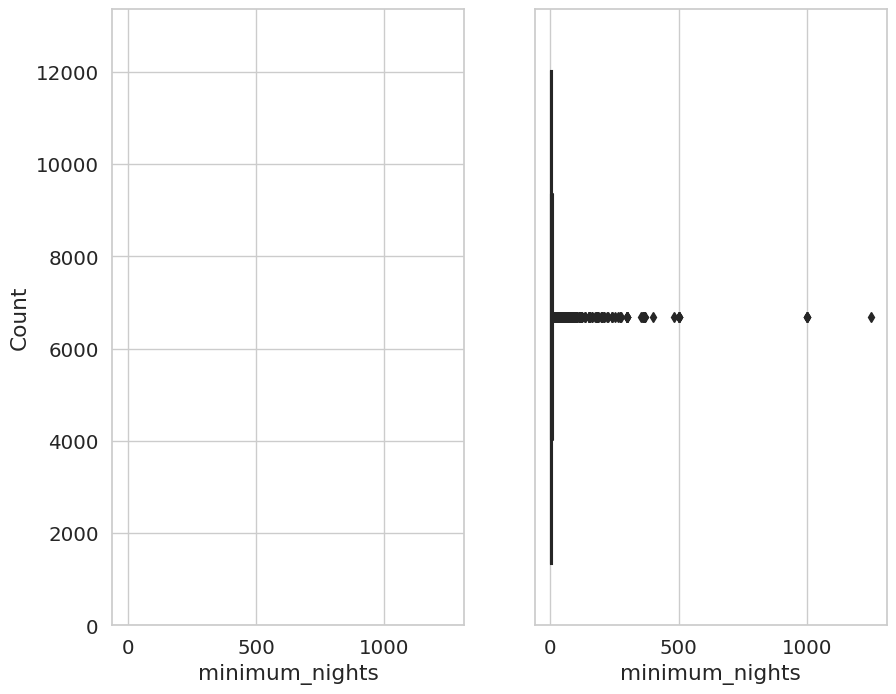

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.histplot(x = df['minimum_nights'], color='teal', ax= ax[0])
ax2 = sns.boxplot(x = df['minimum_nights'], ax= ax[1], color= 'teal')

fig.show()

Checking the Distribution of reviews_per_month

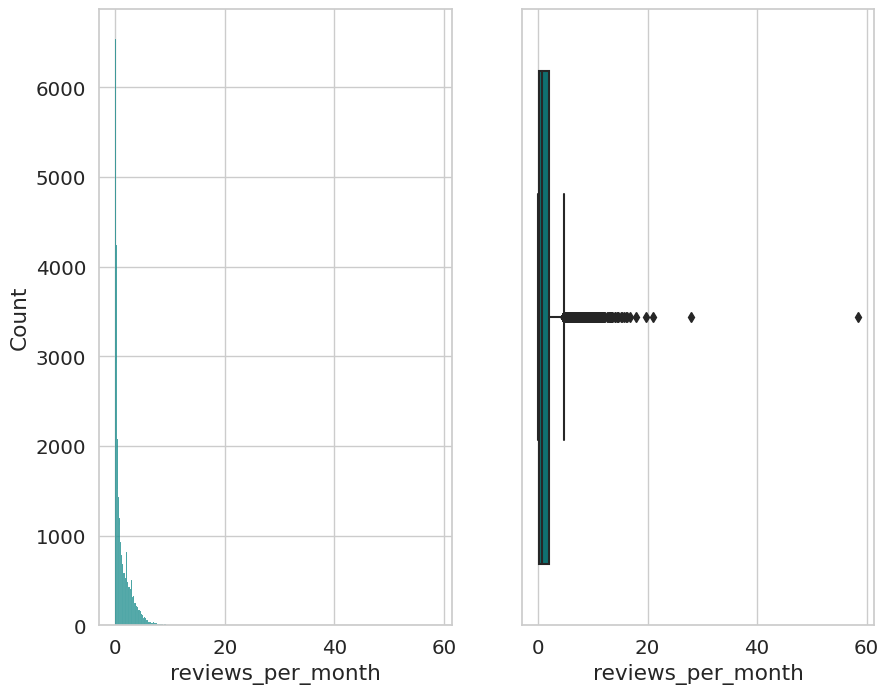

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.histplot(x = df['reviews_per_month'], color='teal', ax= ax[0])
ax2 = sns.boxplot(x = df['reviews_per_month'], ax= ax[1], color= 'teal')

fig.show()


Checking the Distribution of calculated_host_listings_count      
availability_365 

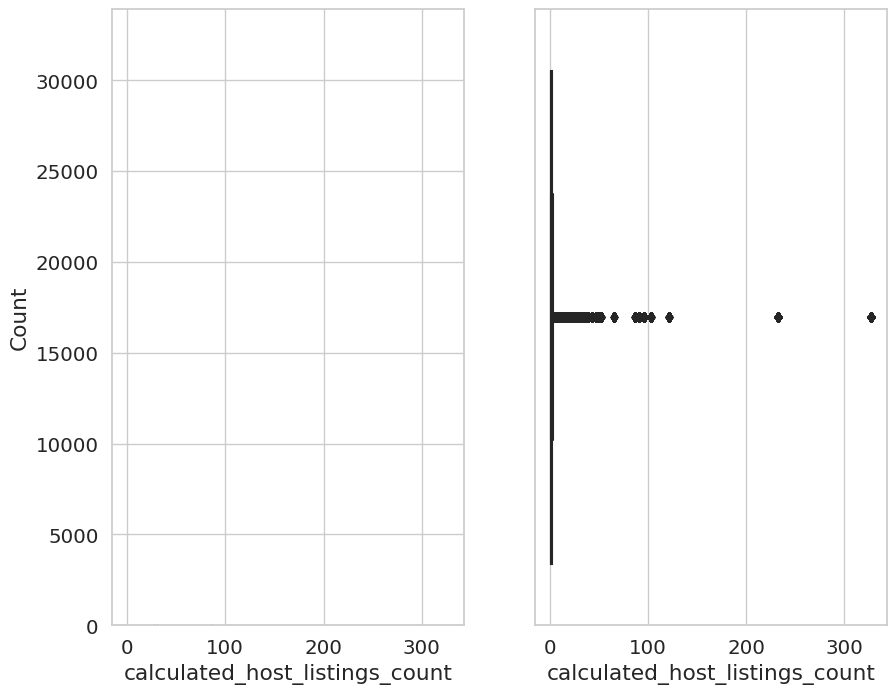

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.histplot(x = df['calculated_host_listings_count'], color='teal', ax= ax[0])
ax2 = sns.boxplot(x = df['calculated_host_listings_count'], ax= ax[1], color= 'teal')

fig.show()

Checking the Distribution of availability_365

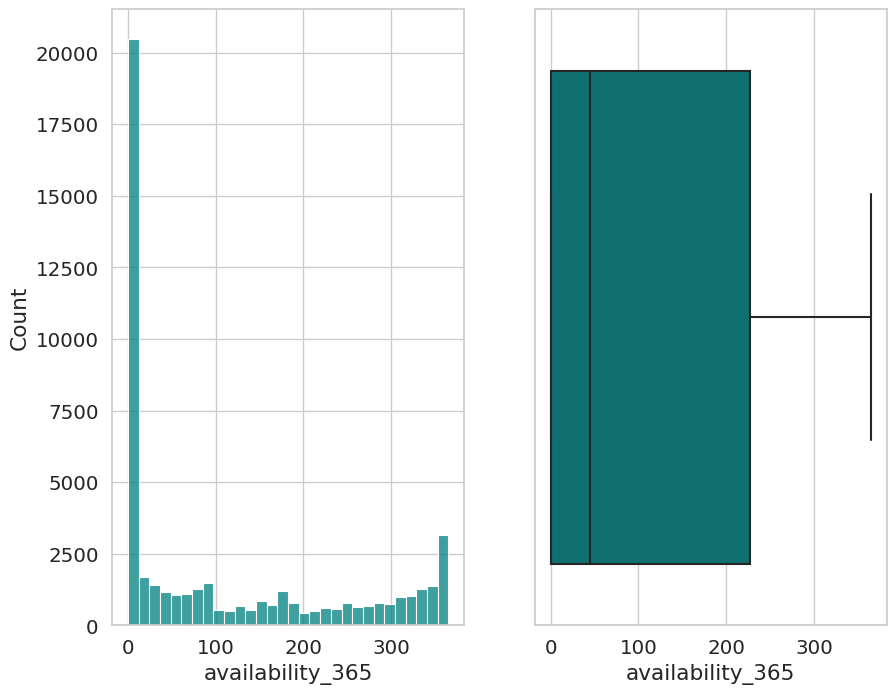

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.histplot(x = df['availability_365'], color='teal', ax= ax[0])
ax2 = sns.boxplot(x = df['availability_365'], ax= ax[1], color= 'teal')

fig.show()

neighbourhood_group

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

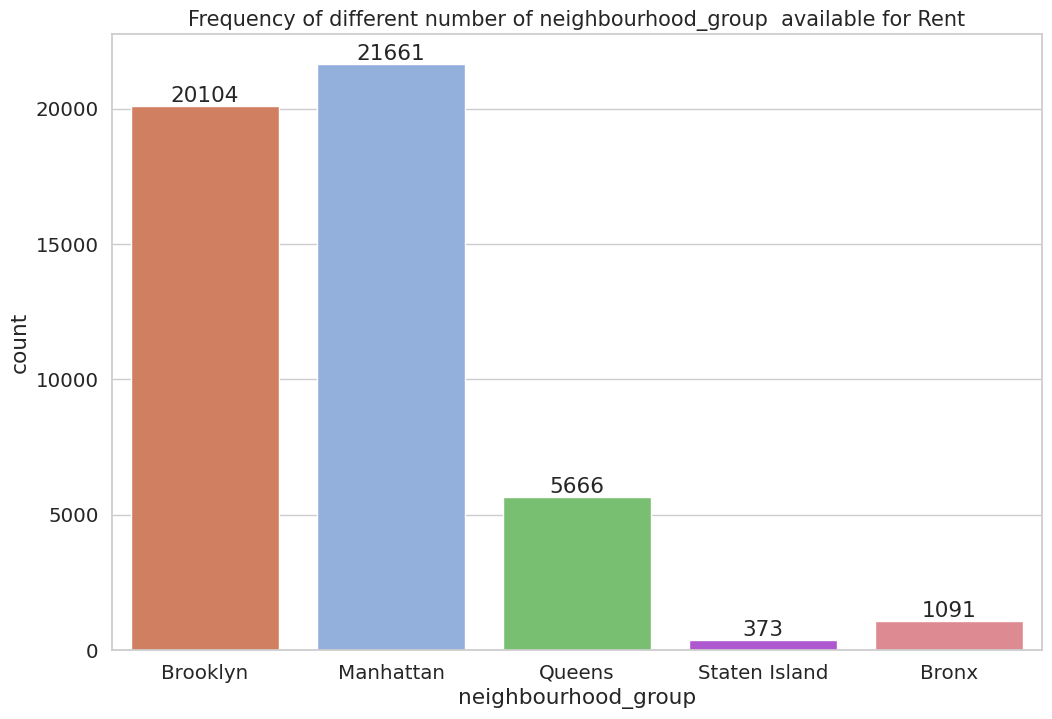

In [ ]:
import plotly.express as px
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='neighbourhood_group',data=df, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of neighbourhood_group  available for Rent',fontsize=15)
plt.show()

fig = px.pie(df, names='neighbourhood_group', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of neighbourhood_group  available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

From the graph, most of  the rental houses located in Manhatten and Broklyn.

Room type

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

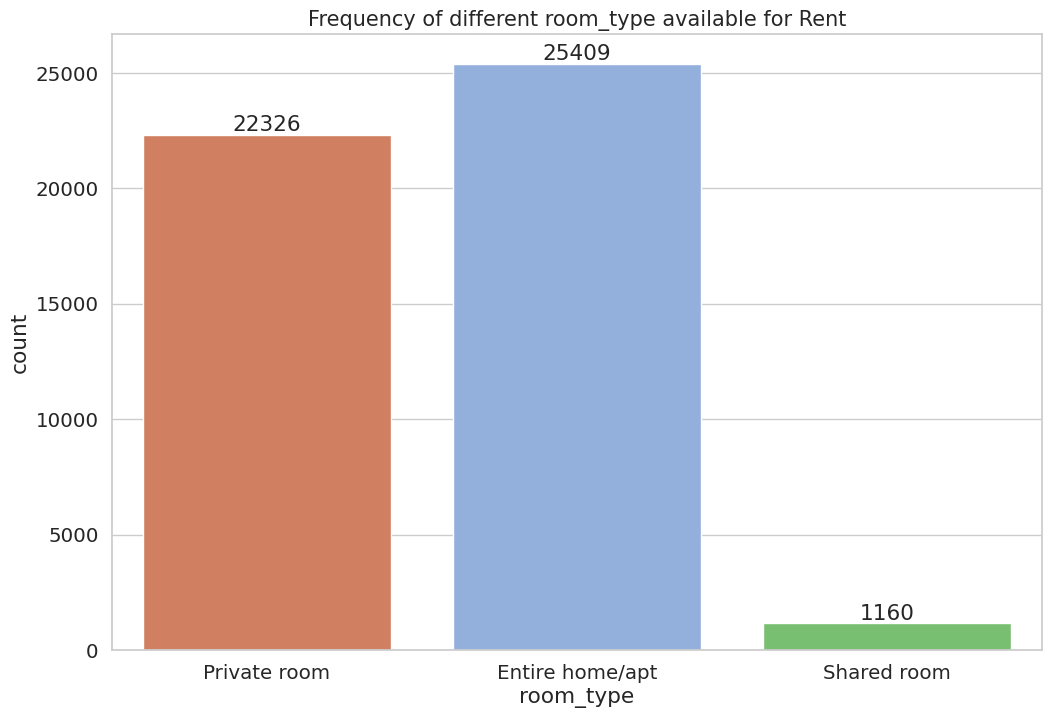

In [ ]:
import plotly.express as px
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='room_type',data=df, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different room_type available for Rent',fontsize=15)
plt.show()

fig = px.pie(df, names='room_type', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different room_type  available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

Mostly,the single home or aparment are rentes the most.

neighbourhood

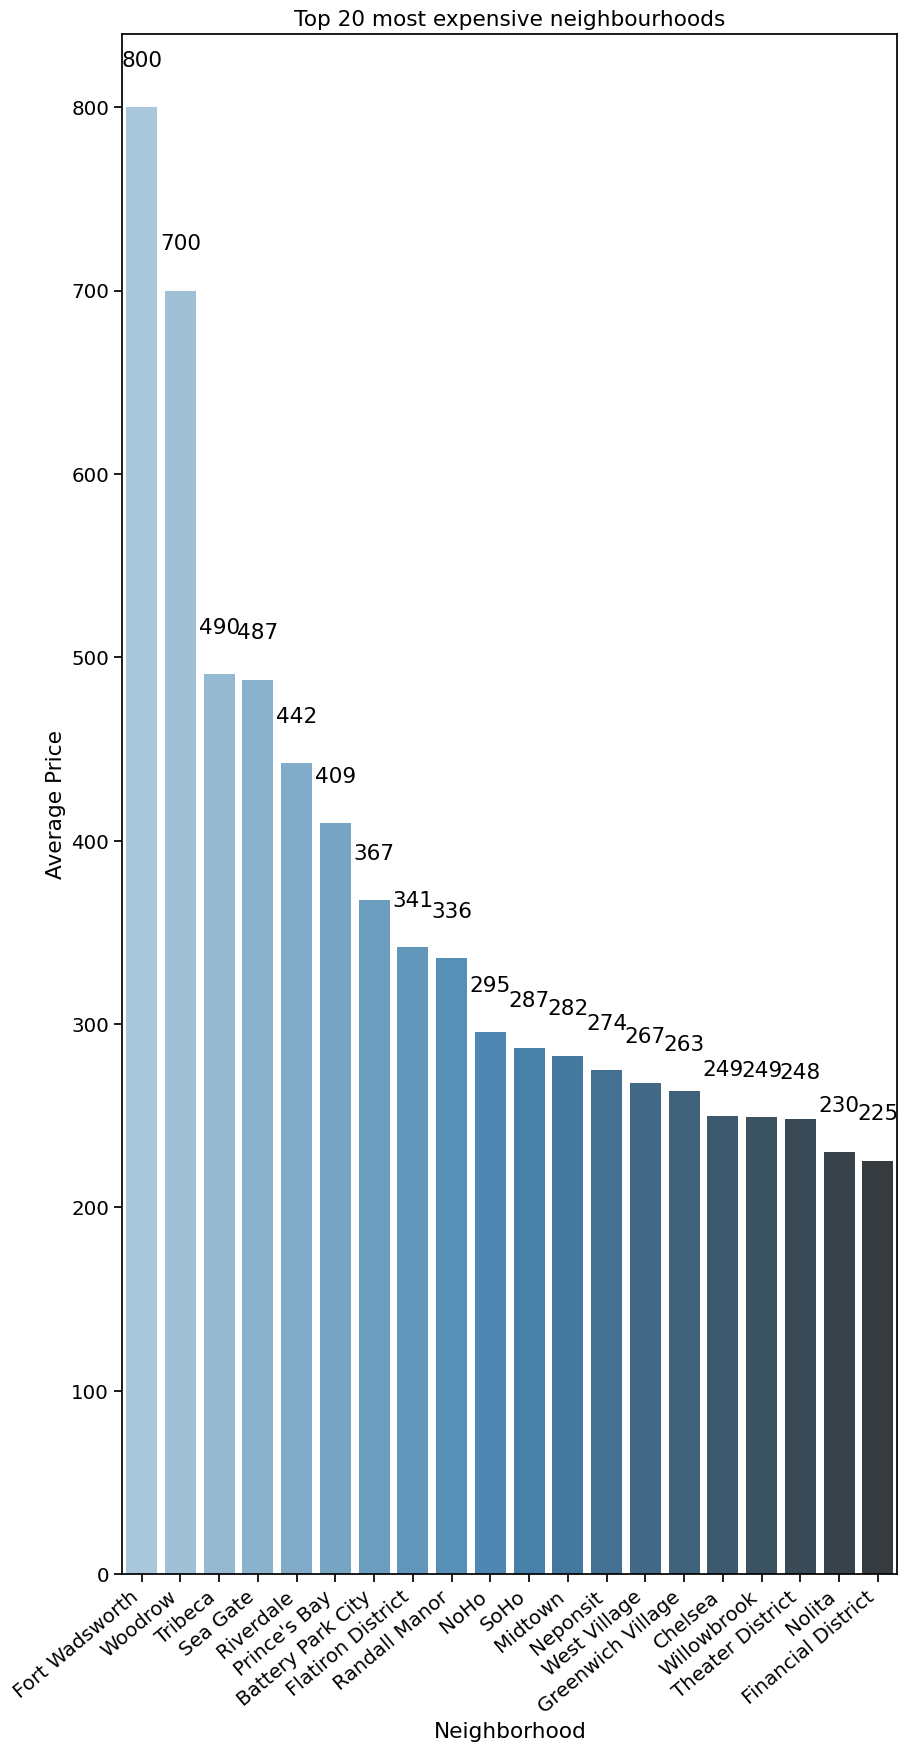

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the mean price by neighborhood and sort in descending order
d = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# create the bar plot
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(x=d.index.tolist()[:20], y=d.values[:20], ax=ax, palette=("Blues_d"))

# customize the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Top 20 most expensive neighbourhoods')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Average Price')

# add annotations to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 20), ha='center', va='bottom', color='Black')



Bivaraint analysis

Plotting categorical variables vs price

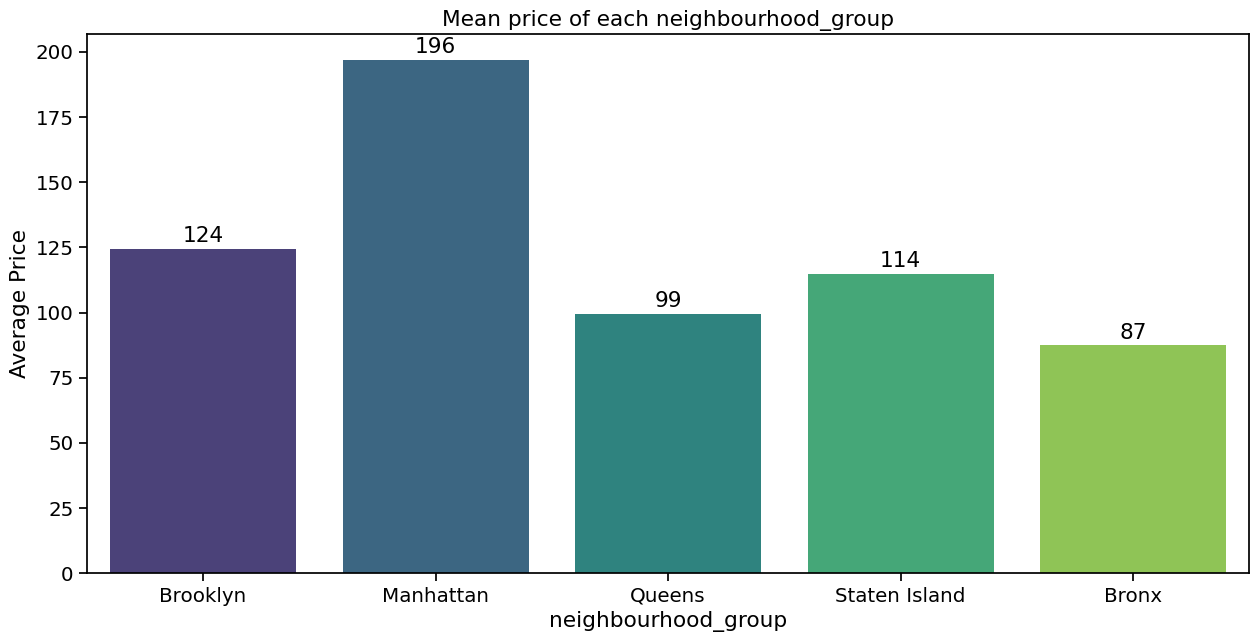

In [77]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['neighbourhood_group'], 
                 y=df['price'], 
                 palette='viridis',
                 errorbar=None
                 )
plt.ylabel('Average Price');
ax.set_title('Mean price of each neighbourhood_group')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Manhattan has the highest rental price  followed by Brooklyn

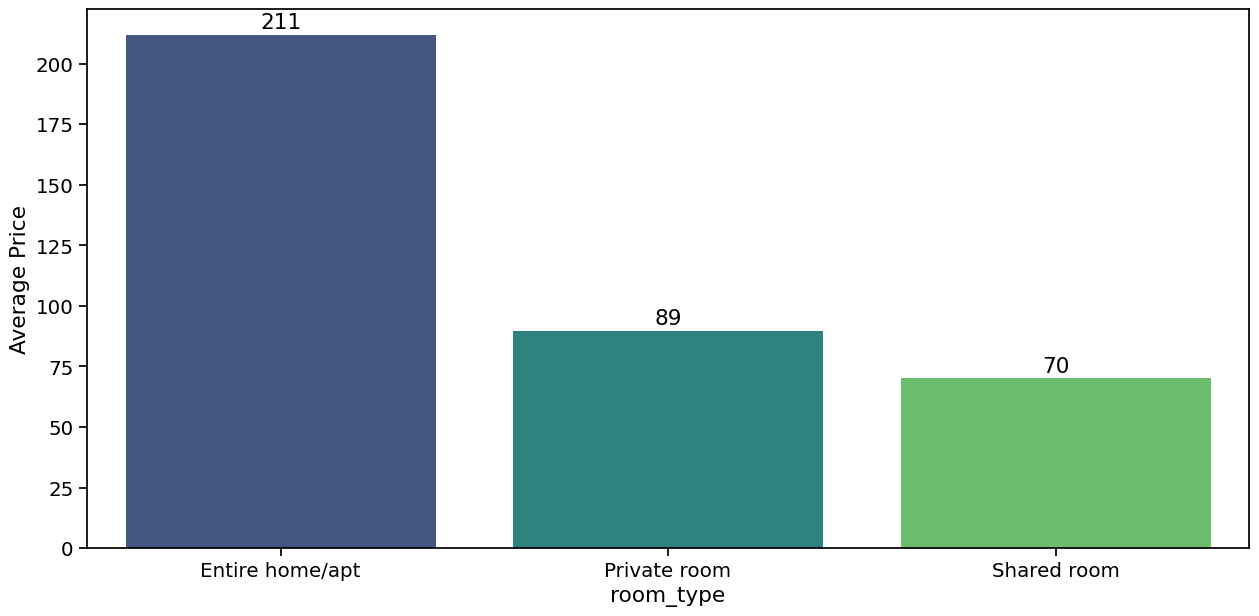

In [78]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['room_type'].sort_values(ascending=True), 
                 y=df['price'], 
                 palette='viridis',
                 errorbar=None)
plt.ylabel('Average Price');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

The price of entire home  is the most expensive then private room and shraed room,

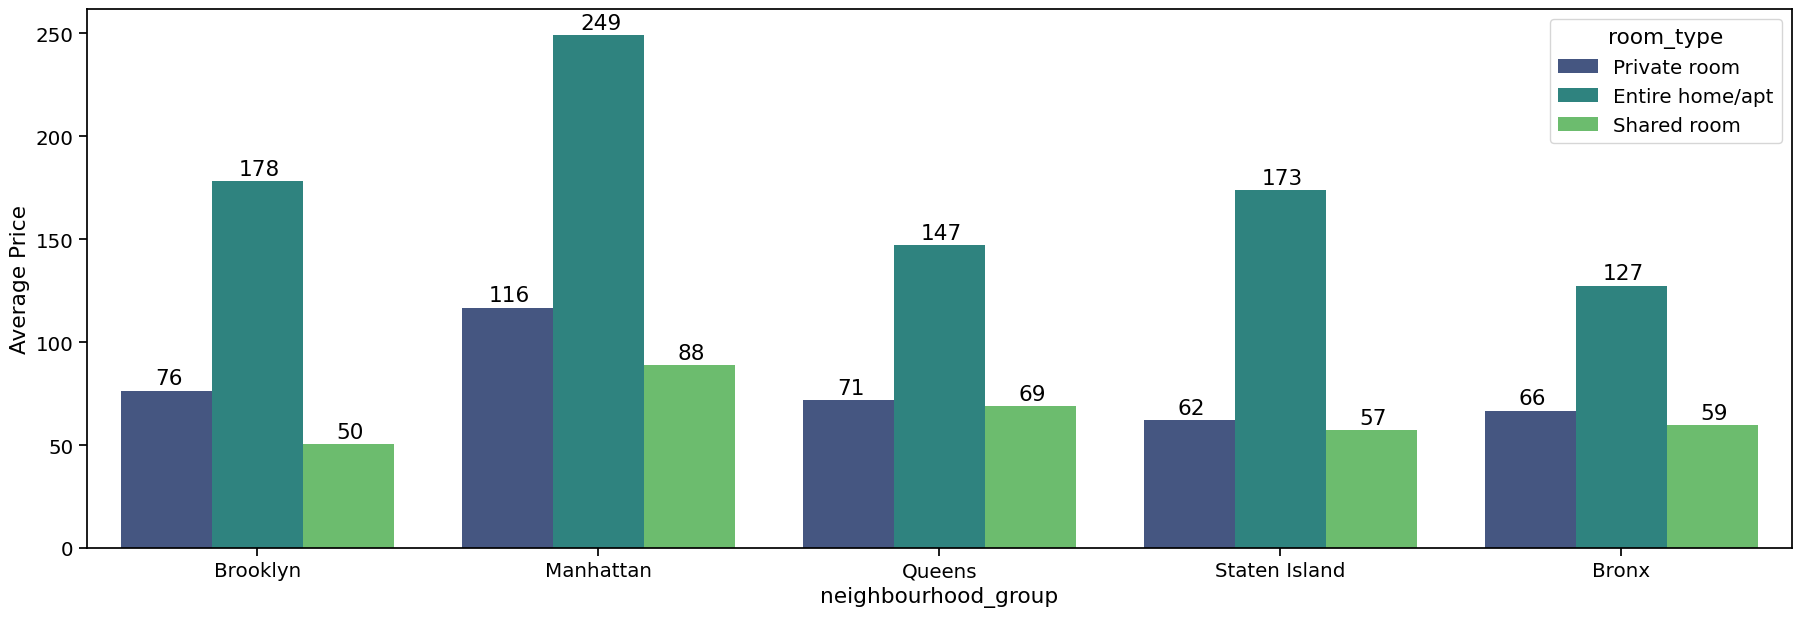

In [79]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['neighbourhood_group'], 
                 y=df['price'],
                 hue = df['room_type'], 
                 palette='viridis',
                 errorbar=None)
plt.ylabel('Average Price');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Manhatten is the most expensive place to stay during holiday.